### Salary - Project

### Predict the salary if the employee using the features provided in the data. 

#### Loading the dataset

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [2]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

### About the Columns

1. rank

It shows the position or designation of the employee.

2. discipline

It show the decipline to which the employee belongs to.

3. yrs.since.phd

It shows the number of years since the employee completed PHD.

4. yrs.service

It shows the number of years of experience of employee in the service.

5. sex

It says about the gender of the employee

6. salary

It shows the salary of the employee. It is calculated from the factors of rest of the columns. It is the Target column.

### Checking whether there are any null values

In [3]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

<AxesSubplot:>

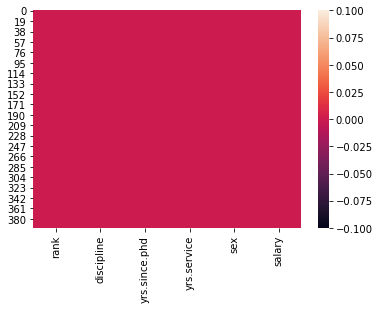

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(df.isnull())

There is no null values in the dataset

### Analysing the Type of values in dataset

In [5]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

The columns ['rank','discipline','sex'] are having categorical data and columns ['yrs.since.phd','yrs.service','salary'] are having numerical values.

### EDA

#### Countplot

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64


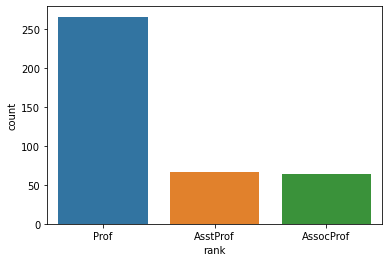

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot('rank',data = df)
print(df['rank'].value_counts())

Majority of the employees are having the rank 'Prof' in the dataset. The least number of employess are having the rank 'AssocProf' in the dataset.

The number of employees with rank 'Prof' is 266.
The number of employees with rank 'AsstProf' is 67.
The number of employees with rank 'AssocProf' is 64.

B    216
A    181
Name: discipline, dtype: int64


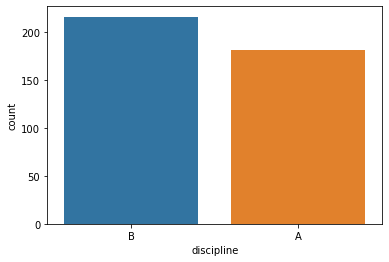

In [7]:
sns.countplot('discipline',data =df)
print(df['discipline'].value_counts())

The employees belonging to discipline 'B' is higher than employees belonging to discpline 'A' in this dataset.

Number of employees belonging to discipline 'A' is 181.
Number of employees belonging to discipline 'B' is 216.

#### Histogram

yrs.since.phd
(0, 10]      87
(10, 20]    106
(20, 30]     93
(30, 40]     76
(40, 50]     30
(50, 60]      5
Name: yrs.since.phd, dtype: int64

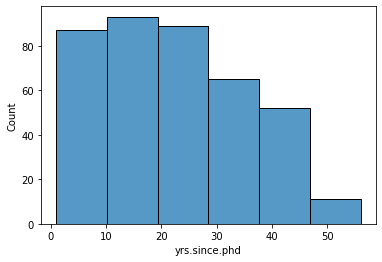

In [8]:
import numpy as np

sns.histplot(df['yrs.since.phd'],bins=6)
a = list(range(0,61,10))
df['yrs.since.phd'].groupby(pd.cut(df['yrs.since.phd'],a)).count()

Employess who have done PhD 10 to 20 years ago are highest in the dataset. Few number of employees have completed PhD 50-60 years ago.

    87 employees have completed PhD within last 10 years. 
    The number of employess who have completed PhD 10-20 years ago is 106.
    The number of employess who have completed PhD 20-30 years ago is 93.
    The number of employees who have completed PhD 30-40 years ago is 76.
    The number of employess who have completed PhD 40-50 years ago is 30.
    The number of empoyess who have completed PhD over 50 years ago is 5.
    

(array([144,  96,  78,  53,  22,   4], dtype=int64),
 array([ 0., 10., 20., 30., 40., 50., 60.]))

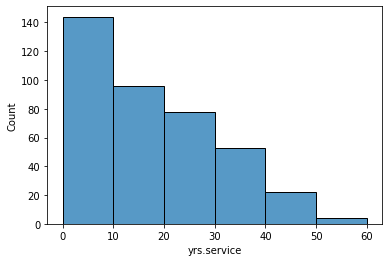

In [9]:
sns.histplot(df['yrs.service'],bins=6)
np.histogram(df['yrs.service'],bins=6)

The most number of employees in the dataset are having less than 10 years service. Only few number of employees are having service more than 50 years.

    The number of employees with less than 10 year service is 144. 
    The number of employees with 11 to 20 year service is 96.
    The number of employees with 21 to 30 year service is 78.
    The number of employees with 31 to 40 years service is 53.
    The number of employees with 41 to 50 years service is 22.
    The number of employees with more than 50 years services is 4.

<AxesSubplot:xlabel='sex', ylabel='count'>

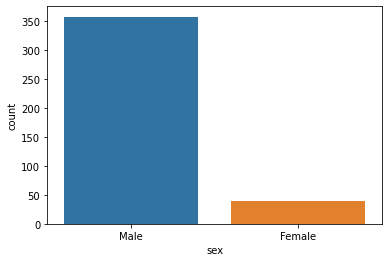

In [10]:
sns.countplot(df['sex'])

The number of male employess is more compared to number of female employees.

<AxesSubplot:xlabel='sex', ylabel='salary'>

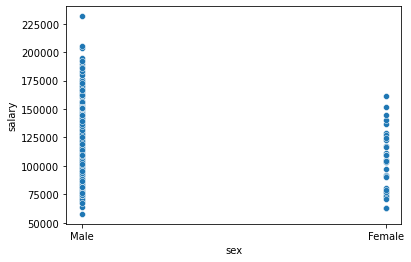

In [11]:
sns.scatterplot('sex','salary',data =df)

The salary of male employees are equally distributed between range of 50,000 and 200,000. The salary of female employees is equally distributed between range of 60,000 and 165,000.

### Encoding DataFrame

In [12]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [13]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i] = enc.fit_transform(df[i].values.reshape(-1,1))

### Correlation

In [14]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

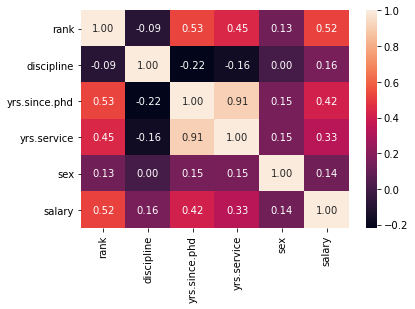

In [15]:
sns.heatmap(df.corr(), annot=True, fmt='0.2f')

All the columns are showing positive correlation with the Target column(Salary).

rank has 52% correlation with target column which is considered as strong bond.
discipline has 16% correlation with target column which is conisered as good bond.
yrs.since.phd has 42% correlation with target column which is considered as strong bond.
yrs.service has 33% correlation with target column which is considered as good bond.
sex has 14% correlation with target column which is considered as good bond.

max_correlation = rank

min_correlation = sex

### Describing Dataset

In [16]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


<AxesSubplot:>

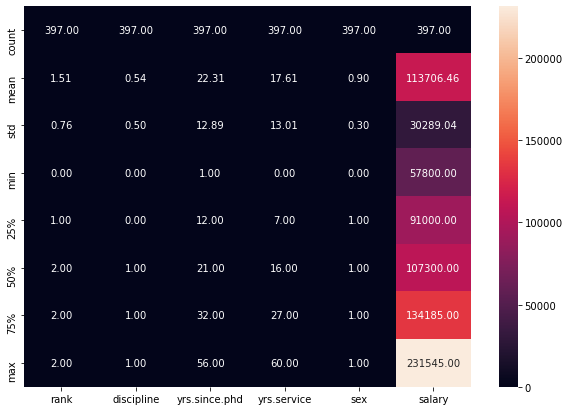

In [17]:
plt.figure(figsize=(10,7))
sns.heatmap(df.describe(),annot=True,fmt='0.2f')

Describing the columns ['yrs.since.phd','yrs.service','salary'].(Rest of the columns are having categorical data).

yrs.since.phd

1. mean = 22.314861
2. std = 12.887003
3. min_value = 1
4. max_value = 56

yrs.service

1. mean = 17.614610
2. std = 13.006024
3. min_value = 0.00
4. max_value = 60

salary

1. mean = 113706.458438
2. std = 30289.038695
3. min_value = 57800
4. max_value = 231545


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           397 non-null    float64
 1   discipline     397 non-null    float64
 2   yrs.since.phd  397 non-null    int64  
 3   yrs.service    397 non-null    int64  
 4   sex            397 non-null    float64
 5   salary         397 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.7 KB


### Skewness

In [19]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

Keeping +/-0.5 as the range for skewness, here are the columns which does not lie within this range.

    rank - categorical
    yrs.service - categorical
    sex - categorical
    salary - target variable
    
Since no column has skewness, we are not considering it

### Checking for outliers

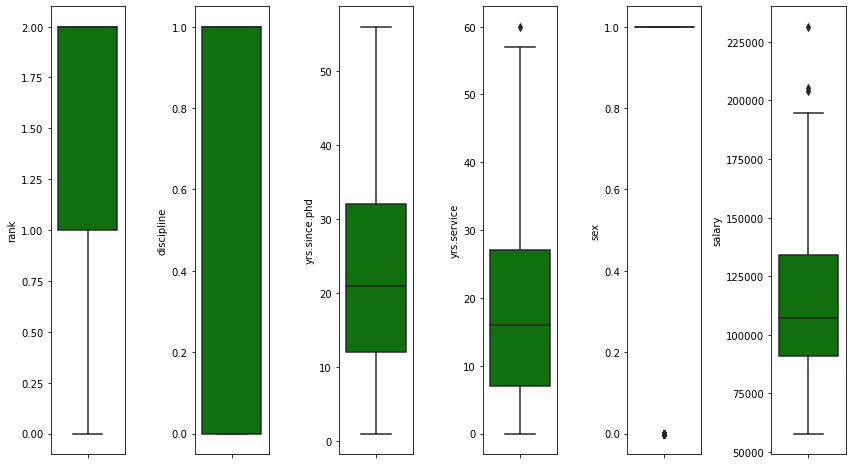

In [20]:
collist = df.columns.values
ncol = 30
nrows = 14
plt.figure(figsize=(2*ncol,3*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(y = df[collist[i]], color='green')
    plt.tight_layout()

There are outliers in column ['yrs.service','sex','salary']. But since column 'sex' is having nominal value, we can't consider it as outlier. Also yrs.service is having categorical values. So it cannot be also considered as outliers. 

### Separating features and target

In [21]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [22]:
print(x.shape)
print(y.shape)

(397, 5)
(397,)


### Scaling the data using Min-Max Scaler

In [23]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
from sklearn.linear_model import LinearRegression


from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [24]:
x = mms.fit_transform(x)

#### LinearRegression

In [25]:
lr = LinearRegression()

In [26]:
#Selecting the best random state

for i in range(0,100):
    x_train, x_test,y_train,y_test = train_test_split(x,y,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print('At random state',i,'the training score is',r2_score(y_train,pred_train))
    print('At random state',i,'the testing score is',r2_score(y_test,pred_test))

At random state 0 the training score is 0.3611999954853077
At random state 0 the testing score is 0.4079258314975234
At random state 1 the training score is 0.3604245854198438
At random state 1 the testing score is 0.41633641876629446
At random state 2 the training score is 0.37547390964955596
At random state 2 the testing score is 0.36001895545266904
At random state 3 the training score is 0.3847313825130594
At random state 3 the testing score is 0.32935298750108644
At random state 4 the training score is 0.38517450334380454
At random state 4 the testing score is 0.3044008133315612
At random state 5 the training score is 0.3950033630150771
At random state 5 the testing score is 0.2752907752774735
At random state 6 the training score is 0.3650308031752798
At random state 6 the testing score is 0.4018987080607569
At random state 7 the training score is 0.3575963886324032
At random state 7 the testing score is 0.43603149833368415
At random state 8 the training score is 0.3707864161761561

At random state 75 the training score is 0.3699093187667537
At random state 75 the testing score is 0.37665450836382297
At random state 76 the training score is 0.3893765947869846
At random state 76 the testing score is 0.2446996775975483
At random state 77 the training score is 0.36208736257404006
At random state 77 the testing score is 0.3868924101156723
At random state 78 the training score is 0.3936404592790972
At random state 78 the testing score is 0.2786653093015006
At random state 79 the training score is 0.3400734467804928
At random state 79 the testing score is 0.5084908819694652
At random state 80 the training score is 0.34891747740210666
At random state 80 the testing score is 0.5086207408821508
At random state 81 the training score is 0.35513373474139565
At random state 81 the testing score is 0.4149346606972967
At random state 82 the training score is 0.37417707170637116
At random state 82 the testing score is 0.35099796023730967
At random state 83 the training score is 0

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state = 80)
lr.fit(x_train,y_train)
pred_lr_test = lr.predict(x_test)

In [28]:
lr.coef_

array([ 32261.27584568,  14693.63290454,  63486.63334679, -34373.64007618,
         4363.13215255])

In [29]:
lr.intercept_

62799.54490712097

In [30]:
lr.score(x_train,y_train)

0.34891747740210666

In [31]:
print(r2_score(y_test,pred_lr_test))

0.5086207408821508


In [32]:
print(mean_squared_error(y_test,pred_lr_test))

325411779.5782903


#### DecisionTree Regressor

In [33]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()


In [34]:
#selecting the best random_state

for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    dtr.fit(x_train,y_train)
    pred_dtr_train = dtr.predict(x_train)
    pred_dtr_test = dtr.predict(x_test)
    print("At random_state",i,"the training score is ",r2_score(y_train,pred_dtr_train))
    print("At random_state",i,"the test score is ",r2_score(y_test,pred_dtr_test))

At random_state 0 the training score is  0.9245597788776638
At random_state 0 the test score is  -0.21402798543480173
At random_state 1 the training score is  0.9289724031454331
At random_state 1 the test score is  -0.23348935777373914
At random_state 2 the training score is  0.9267519949673648
At random_state 2 the test score is  0.13332160941422488
At random_state 3 the training score is  0.9273525209168837
At random_state 3 the test score is  -0.14046919334663177
At random_state 4 the training score is  0.9293718977375937
At random_state 4 the test score is  -0.004873362198916764
At random_state 5 the training score is  0.9615977804419087
At random_state 5 the test score is  0.12263282773248185
At random_state 6 the training score is  0.9235994371564924
At random_state 6 the test score is  0.008977248462351817
At random_state 7 the training score is  0.9294319620999688
At random_state 7 the test score is  -0.4245294982826624
At random_state 8 the training score is  0.934810107891664

At random_state 70 the training score is  0.9364476226126106
At random_state 70 the test score is  -0.25578464250999033
At random_state 71 the training score is  0.9370523740203301
At random_state 71 the test score is  -0.003561120827829889
At random_state 72 the training score is  0.9530909224352898
At random_state 72 the test score is  0.274301599869452
At random_state 73 the training score is  0.9229975344578641
At random_state 73 the test score is  0.23856745280529956
At random_state 74 the training score is  0.9295952838201117
At random_state 74 the test score is  0.043218605419775735
At random_state 75 the training score is  0.9598823408773397
At random_state 75 the test score is  0.16108590574232506
At random_state 76 the training score is  0.9352746570832631
At random_state 76 the test score is  -0.12095494658557238
At random_state 77 the training score is  0.9294954289483245
At random_state 77 the test score is  0.09046665400285459
At random_state 78 the training score is  0.9

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,random_state =96)
dtr.fit(x_train, y_train)
pred_dtr_test = dtr.predict(x_test)

In [36]:
print(r2_score(y_test,pred_dtr_test))

0.4530016517948414


In [37]:
print(mean_squared_error(y_test,pred_dtr_test))

597571136.34375


#### SVR

In [38]:
from sklearn.svm import SVR
svr = SVR('rbf')

In [39]:
for i in range(0,100):
    x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state =i)
    svr.fit(x_train, y_train)
    pred_svr_train = svr.predict(x_train)
    pred_svr_test = svr.predict(x_test)
    print("At random state",i,'the training score is ',r2_score(y_train,pred_svr_train))
    print("At random state",i,'the testing score is ',r2_score(y_test,pred_svr_test))

At random state 0 the training score is  -0.043941393527427985
At random state 0 the testing score is  0.0001399100651099383
At random state 1 the training score is  -0.040415847658240134
At random state 1 the testing score is  -0.0867199384647448
At random state 2 the training score is  -0.03137498970378383
At random state 2 the testing score is  -0.03223532434171794
At random state 3 the training score is  -0.04687269069114963
At random state 3 the testing score is  -0.0466670874044377
At random state 4 the training score is  -0.03563980633395336
At random state 4 the testing score is  -0.09543995677426231
At random state 5 the training score is  -0.0484217756119798
At random state 5 the testing score is  4.4055891791683344e-05
At random state 6 the training score is  -0.04050409115768128
At random state 6 the testing score is  -0.08111280072284432
At random state 7 the training score is  -0.04225207391409458
At random state 7 the testing score is  -0.05169635294817154
At random stat

At random state 68 the training score is  -0.032329090325830645
At random state 68 the testing score is  -0.11744013848150403
At random state 69 the training score is  -0.054562006990143797
At random state 69 the testing score is  0.0010771746551390127
At random state 70 the training score is  -0.05685277960322832
At random state 70 the testing score is  -0.006356336952609398
At random state 71 the training score is  -0.037267944096481376
At random state 71 the testing score is  -0.09955238846727932
At random state 72 the training score is  -0.033045490904429764
At random state 72 the testing score is  -0.108509407800508
At random state 73 the training score is  -0.03995468616604181
At random state 73 the testing score is  -0.07685125021415007
At random state 74 the training score is  -0.045157866140054015
At random state 74 the testing score is  -0.024037970940882447
At random state 75 the training score is  -0.036761861054726674
At random state 75 the testing score is  -0.07641021291

In [40]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state =69)
svr.fit(x_train, y_train)
pred_svr_test = svr.predict(x_test)

In [41]:
print(r2_score(y_test,pred_svr_test))

0.0010771746551390127


In [42]:
print(mean_squared_error(y_test,pred_svr_test))

807838087.8765962


#### From the above models, the DecisionTreeModel is performing better.

In [43]:
pred_dtr_test = dtr.predict(x_test)
from sklearn.model_selection import cross_val_score
score = r2_score(y_test,pred_dtr_test)
for a in range(2,10):
    cvs = cross_val_score(dtr,x,y,cv=a)
    cvsm = cvs.mean()
    print("At cv",a)
    print("Cross Validation score is",cvsm*100)
    print("r2_score is ",score*100)
    print('\n')
    

At cv 2
Cross Validation score is 1.6727793757245313
r2_score is  90.73075314231076


At cv 3
Cross Validation score is -13.07420083614865
r2_score is  90.73075314231076


At cv 4
Cross Validation score is -3.06895314176609
r2_score is  90.73075314231076


At cv 5
Cross Validation score is -11.45303816948285
r2_score is  90.73075314231076


At cv 6
Cross Validation score is 4.857558637010062
r2_score is  90.73075314231076


At cv 7
Cross Validation score is -11.232977107582254
r2_score is  90.73075314231076


At cv 8
Cross Validation score is -3.782538071648277
r2_score is  90.73075314231076


At cv 9
Cross Validation score is -9.342452073595004
r2_score is  90.73075314231076




In [44]:
cvscore_selected = cross_val_score(dtr,x,y,cv=2).mean()
print('CV score is ',cvscore_selected,'\nr2_score is ',score)


CV score is  -0.010642668400399569 
r2_score is  0.9073075314231076


### Model Saving

In [45]:
import pickle
filename = open('Salary-model.pkl','wb')
pickle.dump(dtr,filename)

### Conclusion

In [46]:
a = np.array(y_test)
predicted = np.array(dtr.predict(x_test))
df_com = pd.DataFrame({'Original':a,'Predicted':predicted})
df_com

,Original,Predicted
0,186023,186023.0
1,84000,84000.0
2,90215,90259.5
3,140300,140300.0
4,73300,73300.0
...,...,...
75,103275,103275.0
76,119500,112865.5
77,108262,108262.0
78,95436,102065.0
